# Testing: 
## Classify data points with SSE (Linear Regression)

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

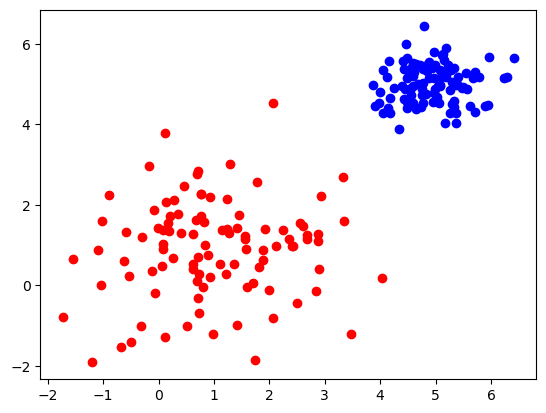

In [9]:
class_A = np.random.normal(loc=(1,1), scale=1.3, size=(100,2))
class_B = np.random.normal(loc=(5,5), scale=0.5, size=(100,2))
labels_A = np.ones(class_A.shape[0])
labels_B = np.zeros(class_B.shape[0])

plt.scatter(class_A[:,0], class_A[:,1], c='r')
plt.scatter(class_B[:,0], class_B[:,1], c='b')
plt.show()

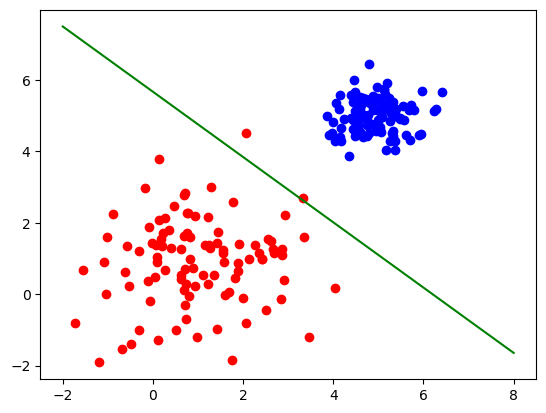

In [11]:
X = np.vstack((class_A, class_B))
y= np.hstack((labels_A, labels_B))

model = LinearRegression()
model.fit(X, y)

#model: w1*x1 + w2*x2 + b = 0.5
x_plot = np.linspace(-2, 8, 100)
y_plot = (0.5  -model.coef_[0]*x_plot - model.intercept_)/model.coef_[1]
plt.plot(x_plot, y_plot, c='g')
plt.scatter(class_A[:,0], class_A[:,1], c='r')
plt.scatter(class_B[:,0], class_B[:,1], c='b')
plt.show()  

# Define a perceptron class

In [25]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors_ = []    
        
    def fit(self, X, y):
        n_samples , n_features = X.shape
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.n_iters):
            errors = 0
            for idx in range(n_samples):
                output = np.dot(X[idx] , self.weights)+ self.bias
                y_pred = self.unit_step(output)
                if y[idx] != y_pred:
                    update = y[idx] * self.learning_rate
                    self.weights += update * X[idx]
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                print ("converged after {} iterations".format(i))
                break
        return self
    
    def unit_step(self, x):
        return 1 if x >= 0 else -1
    
    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        return np.array([self.unit_step(i) for i in output])



## Classify by perceptron

In [26]:
labels_B = -1 *np.ones(class_B.shape[0])

X = np.vstack((class_A, class_B))
y= np.hstack((labels_A, labels_B))

idx_shuffle = np.random.permutation(X.shape[0])
X = X[idx_shuffle]
y = y[idx_shuffle]  

perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X, y)


converged after 3 iterations


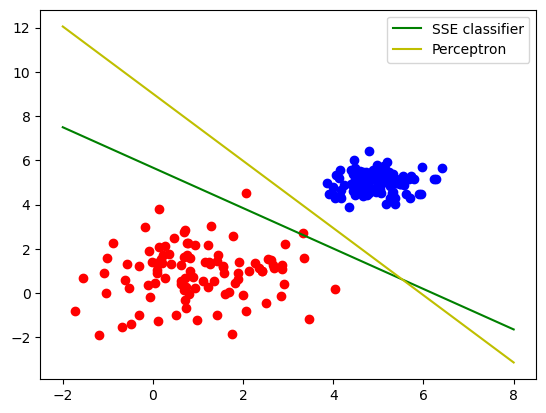

In [22]:
plt.scatter(class_A[:,0], class_A[:,1], c='r')
plt.scatter(class_B[:,0], class_B[:,1], c='b')
plt.plot(x_plot, y_plot, c='g',label="SSE classifier")

x_p = np.linspace(-2, 8, 100)
y_p = (-perceptron.weights[0] * x_p - perceptron.bias) / perceptron.weights[1]
plt.plot(x_p, y_p, c='y', label="Perceptron")
plt.legend()



plt.show()


## breast cancer data

In [44]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

selected_features = ['mean radius', 'mean texture']
X_selected = df[selected_features].values
y_selected = y  # 0 = malignant, 1 = benign

y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2,random_state=42, stratify=y_selected)


perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train_perceptron)
y_pred = perceptron.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_perceptron, y_pred)



0.8859649122807017

In [45]:
perceptron.weights

array([-1.63173, -0.3517 ])

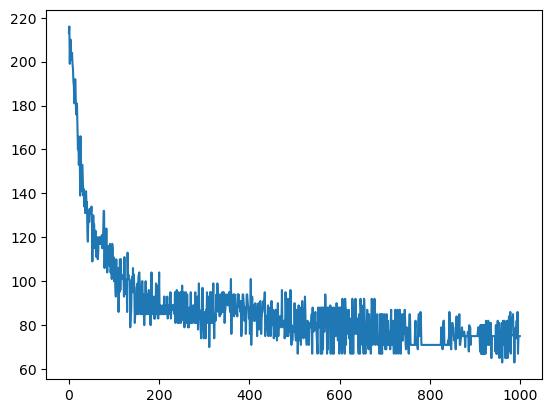

In [46]:
plt.plot(perceptron.errors_)

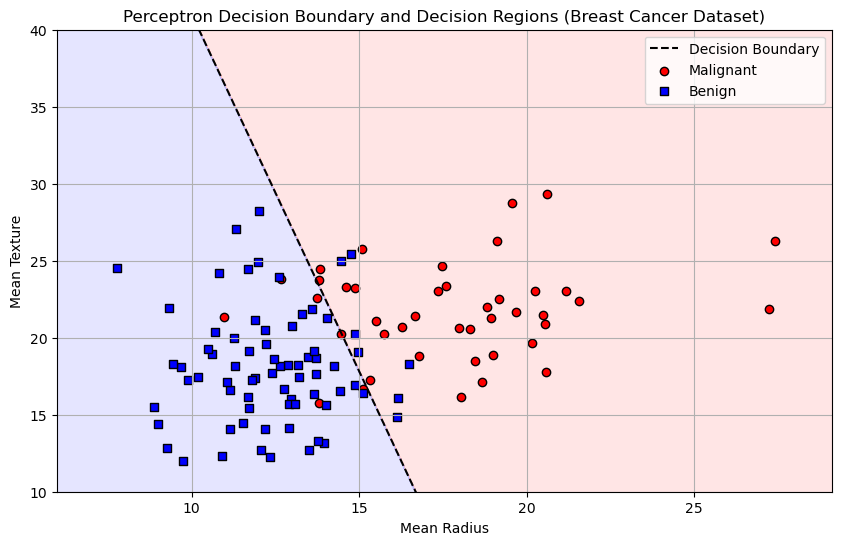

In [49]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

# Malignant: 0 (red), Benign: 1 (blue)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            color='red', marker='o', edgecolor='k', label='Malignant')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color='blue', marker='s', edgecolor='k', label='Benign')

plt.ylim(10,40)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Perceptron Decision Boundary and Decision Regions (Breast Cancer Dataset)')
plt.legend()
plt.grid(True)
plt.show()